
# <span style="color:rgb(213,80,0)">**SPR Biosensor : 1D Grating**</span>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 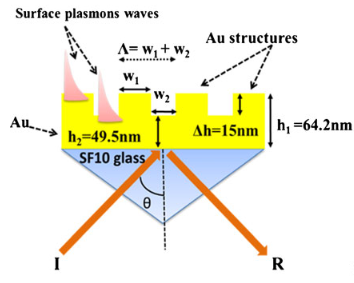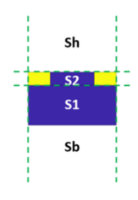


[Enhanced SPR sensitivity with nano\-micro\-ribbon grating \- an exhaustive simulation mapping](https://hal-iogs.archives-ouvertes.fr/hal-00908832)


Maha Chamtouri, Anuj Dhawan, Mondher Besbes, Julien Moreau, Hassen Ghalila, Tuan Vo\-Dinh, Michael Canva *Plasmonics*, 2013, pp.10.1007/s11468\-013\-9600\-4. [⟨10.1007/s11468\-013\-9600\-4⟩](https://dx.doi.org/10.1007/s11468-013-9600-4)

## Data

In [1]:
% Refractive indices
n_H2O = 1.333;
%  {supstrat {grating} layers substrat}
index = {n_H2O , {IndexVal('Au') n_H2O}, IndexVal('Au'), IndexVal('SF10')};
%
% Geometry (µm)
h1 = 0.015; % Grating thickness (µm)
h2 = 0.0495; % Gold layer thickess
dx = 0.4;   % Period x-axis
w1 = dx/2;  % Grating width
%
geom = SetGeom('dx',dx,'mn',{4 []},'ab',{[w1/2 inf] [] },'hc',[h1, h2]);

## Spectrum Computation versus incident angle


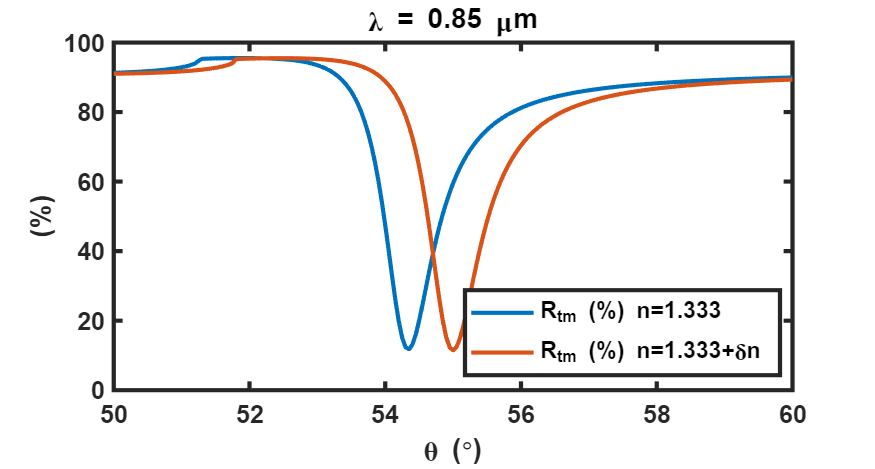

In [2]:
% Incident Plane Wave
lambda = .85;                       % Wavelength(µm)
theta = linspace(50,60,201)*pi/180; % Incident angle (rd)
inc = -1;                           % inc = -1: from down, +1: from top
%
% Spectrum Computation versus incident angle (theta) for a defined wavelength
% n_H2O = 1.333
R_tem1 = Spectrum(index,geom,lambda,theta,inc,'mx',20); % R: TM-TM TM-TE TE-TM TE-TE
%
% n_H2O + Dn : reflectivity variation
index2 = {n_H2O+1e-2 , {IndexVal('Au') n_H2O+1e-2}, IndexVal('Au'), IndexVal('SF10')};
R_tem2 = Spectrum(index2,geom,lambda,theta,inc,'mx',20);
%
% Plot Reflection versus incident angle in TM polarisation
figure('Position',[300  300  560  300]),
PlotCoefRTA(lambda,theta,R_tem1(:,1),R_tem2(:,1)), legend('R_{tm} (%) n=1.333','R_{tm} (%) n=1.333+\deltan')

## Field Computation for a defined polarization (pol = 0 (TE) or 2 (TM) )


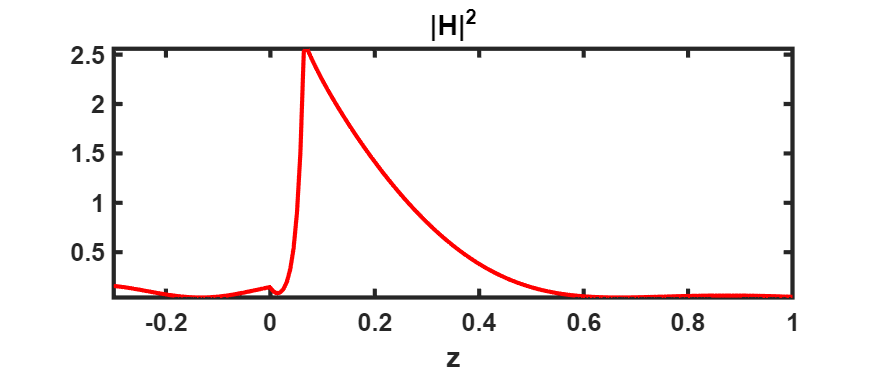

In [3]:
lambda = 0.85;
theta = 54.35*pi/180;
inc = -1;           % inc = -1: from down, +1: from up
%
% S-matrix calculation
s = Spectrum(index,geom,lambda,theta,inc,'mx',40);
%
% Field calculation
[x,y,z] = deal(0,0,linspace(-.3,1,201)); % along z-axis
[E,H] = CalculFieldFMM(s,x,y,z);

% Plot Field distribution
figure('Position',[300  300  560  240]),
VisuFieldFMM(sum(abs(H(:,1:3)).^2,2),x,y,z), axis tight,title('|H|^2')

## Field Distribution at plan (xOz)


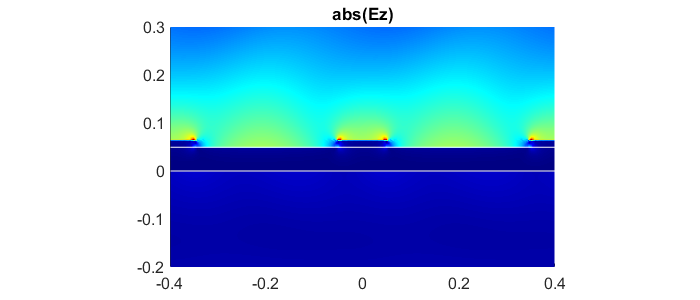

In [4]:
% Field calculation
[x,y,z] = deal(linspace(-dx,dx,200),0,linspace(-.2,.3,201)); % (xoz)
[E,H] = CalculFieldFMM(s,x,y,z);

% Plot Field distribution
figure('Position',[300  300  560  240]), hold on
VisuFieldFMM(abs(E(:,3)),x,y,z), axis tight,title('abs(Ez)')
plot([min(x) max(x)],[0 0],'w',[min(x) max(x)],[h2 h2],'w')

## Absorptivity map versus wavelength and incident angle


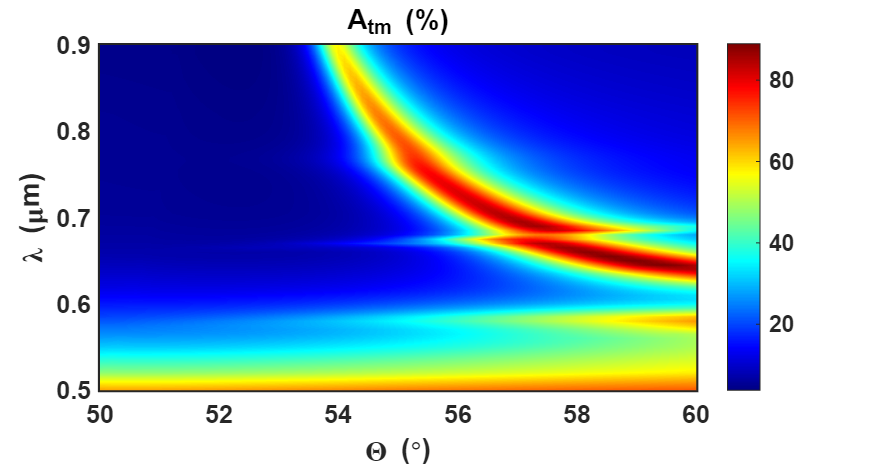

In [5]:
% Incident Plane Wave
lambda = linspace(.5,.9,81);        % Wavelength(µm)
theta = linspace(50,60,101)*pi/180; % Incident angle (rd)
inc = -1;                           % inc = -1: from down, +1: from top
%
% Spectrum Computation versus incident angle and wavelength
[R_tm,T_tm,R_te,T_te] = Spectrum(index,geom,lambda,theta,inc,'mx',20);
%
% Plot Absorptivity (A=1-R-T) versus incident angle in TM polarisation
figure('Position',[300  300  560  300]),
PlotCoefRTA(lambda,theta,1-R_tm-T_tm), title('A_{tm} (%)')

## Reflectivity map versus wavelength and incident angle

In [6]:
% Incident Plane Wave
lambda = linspace(.5,.8,91);        % Wavelength(µm)
theta = linspace(50,88,101)*pi/180; % Incident angle (rd)
inc = -1;                           % inc = -1: from down, +1: from top
%
% Spectrum Computation versus incident angle and wavelength
[R_tm,T_tm,R_te,T_te] = Spectrum(index,geom,lambda,theta,inc,'mx',20,'Num',-2:2);


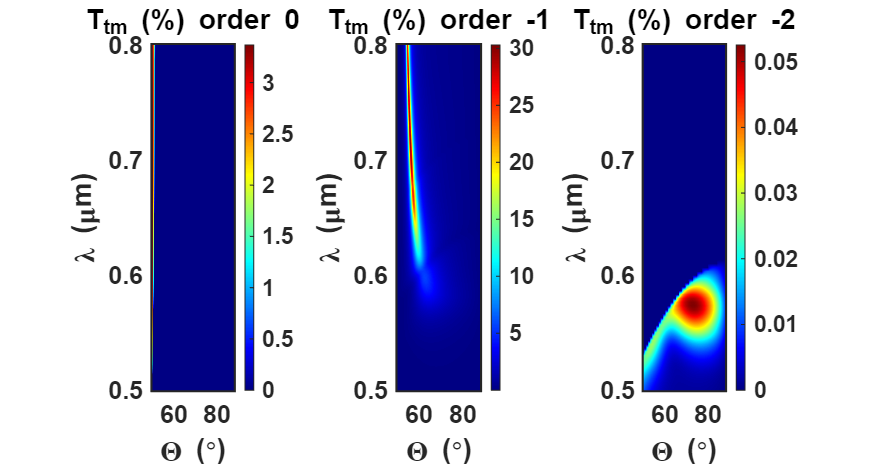

In [7]:
%
% Plot Absorptivity (A=1-R-T) versus incident angle in TM polarisation
figure('Position',[300  300  560  300]),
subplot(131),PlotCoefRTA(lambda,theta,T_tm(:,:,3)), title('T_{tm} (%) order 0')
subplot(132),PlotCoefRTA(lambda,theta,T_tm(:,:,2)), title('T_{tm} (%) order -1')
subplot(133),PlotCoefRTA(lambda,theta,T_tm(:,:,1)), title('T_{tm} (%) order -2')

## Test of convergence


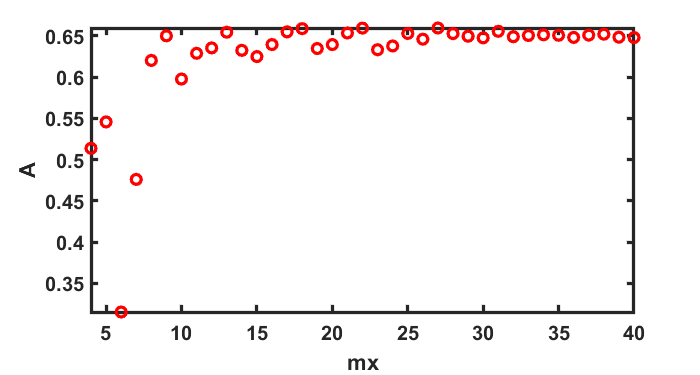

In [8]:
% Incident Plane Wave
lambda = 0.85;
theta = 54.35*pi/180;
inc = -1;           % inc = -1: from down, +1: from up
%
TabM = 4:1:40;      % Number of Fourier terms
A = zeros(size(TabM));
%
figure('Position',[300  300  560  300]), hold on
%
for k = 1:length(TabM)
    mx = TabM(k);
    s = Spectrum(index,geom,lambda,theta,inc,'mx',mx);
    % A=1-R-T
    A(k) = 1-(s.R_tem(1)+s.R_tem(2))-(s.T_tem(1)+s.T_tem(2));
    PlotCourbe(mx,A(k),'mx','A','','or'), drawnow
end